#Get the dataset

In [ ]:
from google.colab import drive
import sys, os
import warnings 
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# this block used to import modules
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

In [ ]:
# the data in the links.csv file
links_df = pd.read_csv('/content/drive/Shareddrives/ECE219_P3/links.csv')
# the data in the movies.csv file
movies_df = pd.read_csv('/content/drive/Shareddrives/ECE219_P3/movies.csv')
# the data in the ratings.csv file
ratings_df = pd.read_csv('/content/drive/Shareddrives/ECE219_P3/ratings.csv')
# the data in the tags.csv file
tags_df = pd.read_csv('/content/drive/Shareddrives/ECE219_P3/tags.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
links_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [ ]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
ratings_df.head()

,Unnamed: 0,userId,movieId,rating,timestamp
0,0,496,112852,3.0,1415520462
1,1,391,1947,4.0,1030945141
2,2,387,1562,1.5,1095041022
3,3,474,2716,4.5,1053020930
4,4,483,88125,4.5,1311337237


In [ ]:
tags_df.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


##Question 1: Explore the Dataset

###A. Compute the sparsity of the movie rating dataset

Total number of available ratings -> the # of rows in the ratings_df

Total number of possible ratings -> the # of total movies $\times$ the # of total users

In [ ]:
# the number of rows in the ratings_df
available_ratings = ratings_df.shape[0]
print(available_ratings)

In [ ]:
# the number of total moives
movies_num = movies_df.shape[0]
print(movies_num)

In [ ]:
# the number of total users
users_num = ratings_df.userId.unique().size
print(users_num)

In [ ]:
# to calculate the sparsity of the movie rating dataset, we have
sparsity = available_ratings / (movies_num * users_num)
print(f'{sparsity:.6f}')

###B. Plot a histogram showing the frequency of the rating values

In [ ]:
ratings = ratings_df['rating']

In [ ]:
ratings.describe()

In [ ]:
rating_bins = np.arange(0, ratings.max()+1, 0.5)

plt.figure(figsize=(12,9))
counts, edges, bars = plt.hist(ratings, bins=rating_bins, edgecolor='w')

for pp in bars:
   x = pp.get_x() + pp.get_width() / 8
   y = pp.get_y() + pp.get_height() + 500
   plt.text(x, y, pp.get_height())
plt.xticks(rating_bins)
plt.show()

###Comments on the shape of the histogram:

1. Most ratings are greater than or equal to 3

2. The most frequent rating in the dataset is 4

3. The least frequent rating in the dataset is 0.5




###C. Plot the distribution of the number of ratings received among movies

In [ ]:
# X-axis: the movie index ordered by decreasing frequency
# Y-axis: the number of ratings the movie has received
# a monotonically decreasing trend is expected

# movieId with the times it's been rated
movie_freq = ratings_df['movieId'].value_counts(ascending=False)
movie_freq_df = pd.DataFrame(movie_freq)
movie_freq_df = movie_freq_df.reset_index().rename(columns={"index": "movieId", "movieId": "freq"})
movie_freq_df['movieId'] = movie_freq_df['movieId'].astype(str)

In [ ]:
movie_freq_df.head()

In [ ]:
# the # of movies is too large, and we can plot a subportion with a decreasing trend 
subset_movie_freq = movie_freq_df.loc[1:81, 'movieId':'freq']

In [ ]:
plt.figure(figsize=(16,12))
plt.bar(subset_movie_freq['movieId'], subset_movie_freq['freq'],width=0.8)
plt.xticks(rotation=90)
plt.show()

In [ ]:
subset_movie_freq2 = movie_freq_df.tail(100)
plt.figure(figsize=(16,12))
plt.bar(subset_movie_freq2['movieId'], subset_movie_freq2['freq'],width=0.8)
plt.xticks(rotation=90)
plt.show()

###D. Plot the distribution of ratings among users

In [ ]:
user_freq = ratings_df['userId'].value_counts(ascending=False)
user_freq_df = pd.DataFrame(user_freq)
user_freq_df = user_freq_df.reset_index().rename(columns={"index": "userId", "userId": "freq"})
user_freq_df['userId'] = user_freq_df['userId'].astype(str)

In [ ]:
user_freq.shape

In [ ]:
user_freq_df.shape

In [ ]:
subset_user_freq = user_freq_df.loc[1:81, 'userId':'freq']

In [ ]:
plt.figure(figsize=(16,12))
plt.bar(subset_user_freq['userId'], subset_user_freq['freq'],width=0.8)
plt.xticks(rotation=90)
plt.show()

###E. Discuss the salient features of the distributions

From the plot of question C, we can tell that most of the movies have received limited amount of ratings. The largest number of ratings received by a movie is 329 and the smallest number of ratings is 1. Most of movies have very few ratings and a small number of movies received majority of the ratings (Same for the distribution in question D). Therefore, the ratings matrix R has a low sparsity(i.e the ratings matrix is very sparse), and this low sparsity can lead to overfitting problems if directly used without preprocessing or regulations.

###F. Compute the variance of the rating values received by each movie.

In [ ]:
ratings_var = ratings_df.groupby('movieId')['rating'].var()
ratings_var

In [ ]:
ratings_var_df = pd.DataFrame(ratings_var)
ratings_var_df = ratings_var_df.rename(columns={"rating": "rating_variance"})
ratings_var_df = ratings_var_df.fillna(0)
ratings_var = ratings_var_df['rating_variance']
ratings_var_df.describe()

In [ ]:
rating_var_bins = np.arange(0, ratings_var.max()+1, 0.5)

plt.figure(figsize=(12,9))
counts, edges, bars = plt.hist(ratings_var, bins=rating_var_bins, edgecolor='w')

for pp in bars:
   x = pp.get_x() # + (pp._x1 - pp._x0) / 8
   y = pp.get_y() + pp.get_height() + 50
   plt.text(x, y, pp.get_y() + pp.get_height())
plt.xticks(rating_var_bins)
plt.show()

From the histogram here, we can find that majority of the movies have a rating variance less than 2.5. This means the ratings for each movie in the dataset are relatively consistent and trustworthy.

#Two Collaborative Filtering Methods

##Neighborhood-based collaborative filtering

### Question 2:

####A. Write down the formula for $
\mu_u$ in terms of $I_u$ and $r_uk$;

---



$\frac{\sum_{k \  \in \ I_{u}} r_{uk}}{|I_u|}$

####B. In plain words, explain the meaning of Iu ∩ Iv. Can Iu ∩ Iv = ∅? (Hint: Rating matrix R is sparse)

Intersection of $I_u$ and $I_v$ simply means the set of item indices which both u and v have given ratings. The intersection can be empty as it is such a big data set. This can happen when two people never gave a rating to a same item. However, we don't need to care about such pairing bacuase empty set provides no information to infer their similarities.

###Question 3:

The prediction function is designed to estimate the rating user u woulf give to item j based on the rating user v gave. The mean-centering the raw ratings $r_{vj} - \mu_{v}$ can represent the preference of user v. If users either give very high or low ratings on items, we can not distinguish the degree of preference only based on their average ratings. Subtracting the mean rating of each user from their ratings can reduce the bias, and so that we can obtain a more accurate representation of how the user rates this item relative to their own average.




###Question 4:

In [ ]:
ratings_df

In [ ]:
!pip3 install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 KB 23.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp38-cp38-linux_x86_64.whl size=3366509 sha256=baf8acd8269615f4b96b1d6e136f6f4f20a36f97e5d6dec79a1f92b412293d23
  Stored in directory: /root/.cache/pip/wheels/af/db/86/2c18183a80ba05da35bf0fb7417aac5cddbd93bcb1b92fd3ea
Successfully built scikit-surprise


In [ ]:
from surprise import KNNWithMeans, Dataset, Reader, accuracy, NMF
from surprise.model_selection import KFold

In [ ]:
# define the knn with pearson correlation coefficient
sim_options = {'name': 'pearson', 'user_based': True}
knn = KNNWithMeans(k=100, sim_options=sim_options, verbose = False)
kf = KFold(n_splits = 10)

reader = Reader(rating_scale=(1, 5))
dataset = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']], reader)
# trainset = dataset.build_full_trainset()

In [ ]:
kf = KFold(n_splits = 10)

reader = Reader(rating_scale=(1, 5))
dataset = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']], reader)
# trainset = dataset.build_full_trainset()

k_list = [i for i in range(2,101,2)]
rmse_average = []
mae_average = []

for i in range(2, 101, 2):
  rmse_scores = []
  mae_scores = []
  knn = KNNWithMeans(k=i, sim_options=sim_options, verbose = False)
  for train_index, test_index in kf.split(dataset):
    # train_data, test_data = ratings_df.iloc[train_index], ratings_df.iloc[test_index]

    knn.fit(train_index)
    predictions = knn.test(test_index) 
    
    rmse_scores.append(accuracy.rmse(predictions, verbose = False))
    mae_scores.append(accuracy.mae(predictions, verbose = False))

  rmse_average.append(np.mean(rmse_scores))
  mae_average.append(np.mean(mae_scores))
  # print(f'For k = {i}, we have a RMSE score of: {np.mean(rmse_scores)}')
  # print(f'For k = {i}, we have a MAE score of: {np.mean(mae_scores)}')
  # print('---'*20)

###plot average RMSE (Y-axis) against k (X-axis) and average MAE (against) k (X-axis)

In [ ]:
# average RMSE (Y-axis) against k (X-axis)
k_vals = range(2, 101, 2) 
plt.plot(k_vals, rmse_average)
# naming the x axis
plt.xlabel('k')
# naming the y axis
plt.ylabel('Average RMSE')

In [ ]:
# average MAE (against) k (X-axis)
plt.plot(k_vals, mae_average)
plt.xlabel('k')
plt.ylabel('Average MAE')

###Question 5:

The minimun k is about 20.

In [ ]:
kf = KFold(n_splits = 10)

reader = Reader(rating_scale=(1, 5))
dataset = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']], reader)
# trainset = dataset.build_full_trainset()

k_list = [i for i in range(2,101,2)]
rmse_average = []
mae_average = []

def knn_fit(data, rmse_average, mae_average):
  for i in range(2, 101, 2):
    # 0. set up the knn
    knn = KNNWithMeans(k=i, sim_options=sim_options, verbose = False)

    # 1. First change the data compatible to surprise 
    reader = Reader(rating_scale=(1, 5))
    dataset = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']], reader)

    # 2. For each k, we create empty lists for storing rmse and mae scores
    rmse_scores = []
    mae_scores = []

    # 3. Perform the 10 fold cross validation
    for train_index, test_index in kf.split(dataset):
      knn.fit(train_index)
      predictions = knn.test(test_index) 
      

      rmse_scores.append(accuracy.rmse(predictions, verbose = False))
      mae_scores.append(accuracy.mae(predictions, verbose = False))

    # 4. For each fold of validation: we append the average rmse and mae score
    rmse_average.append(np.mean(rmse_scores))
    mae_average.append(np.mean(mae_scores))

In [ ]:
import plotly.graph_objects as go
trace1 = go.Scatter(x=k_list, y=rmse_average, mode='markers', name='RMSE')
trace2 = go.Scatter(x=k_list, y=mae_average, mode='markers', name='MAE')

fig = go.Figure()
fig.add_trace(trace1)
fig.add_trace(trace2)

fig.update_layout(
    xaxis_title='K-values',
    yaxis_title='error scores',
    title='K-values vs error scores'
)

fig.show()

From the plots above, we can find the 'minimum k' is about 20

The steady status value of average RMSE is $\approx 0.8915$

The steady status value of average MAE is $\approx 0.6794$

##Model-based collaborative filtering

###Question 6:

In [ ]:
from surprise.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import plotly.graph_objs as go
import plotly.offline as py

In [ ]:
# 1. Try to get the Popular movie trimming:
rate_counts = ratings_df.groupby('movieId')['rating'].count()
popular_movies = rate_counts[rate_counts > 2].index
popular_movie_df = ratings_df[ratings_df['movieId'].isin(popular_movies)]
popular_movie_df['movieId'].value_counts()

356       329
318       317
296       307
593       279
2571      278
         ... 
251         3
5470        3
114074      3
5075        3
74508       3
Name: movieId, Length: 4980, dtype: int64

In [ ]:
# 2. Try to get the Unpopular movie trimming:
unpopular_movies = rate_counts[rate_counts <= 2].index
unpopular_movie_df = ratings_df[ratings_df['movieId'].isin(unpopular_movies)]
unpopular_movie_df['movieId'].value_counts()

4142      2
5051      2
3694      2
6280      2
5083      2
         ..
96114     1
4962      1
563       1
139747    1
6101      1
Name: movieId, Length: 4744, dtype: int64

In [ ]:
# 3. Try to get the High variance movie trimming:
five_rating_movies = rate_counts[rate_counts >= 5].index
five_rating_movie_df = ratings_df[ratings_df['movieId'].isin(five_rating_movies)]

movie_variances = five_rating_movie_df.groupby('movieId')['rating'].var()
filtered_movie_ids = movie_variances[movie_variances >= 2].index
high_variance_df = five_rating_movie_df[five_rating_movie_df['movieId'].isin(filtered_movie_ids)]

In [ ]:
print(ratings_df.shape)
print(popular_movie_df.shape)
print(unpopular_movie_df.shape)
print(high_variance_df.shape)

In [ ]:
popular_dataset = Dataset.load_from_df(popular_movie_df[['userId', 'movieId', 'rating']], reader)
unpopular_dataset = Dataset.load_from_df(unpopular_movie_df[['userId', 'movieId', 'rating']], reader)
high_variance_dataset = Dataset.load_from_df(high_variance_df[['userId', 'movieId', 'rating']], reader)

In [ ]:
def knn_fit(data, rmse_average, mae_average):
  for i in range(2, 101, 2):
    # 0. set up the knn
    knn = KNNWithMeans(k=i, sim_options=sim_options, verbose = False)

    # 1. First change the data compatible to surprise 
    # reader = Reader(rating_scale=(1, 5))
    # dataset = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']], reader)

    # 2. For each k, we create empty lists for storing rmse and mae scores
    rmse_scores = []
    mae_scores = []

    # 3. Perform the 10 fold cross validation
    for train_index, test_index in kf.split(data):
      knn.fit(train_index)
      predictions = knn.test(test_index) 

      rmse_scores.append(accuracy.rmse(predictions, verbose = False))
      mae_scores.append(accuracy.mae(predictions, verbose = False))

    # 4. For each fold of validation: we append the average rmse and mae score
    rmse_average.append(np.mean(rmse_scores))
    mae_average.append(np.mean(mae_scores))

In [ ]:
def plot_rmse_mae(rmse_average, mae_average):
  k_list = [i for i in range(2,101,2)]
  trace1 = go.Scatter(x=k_list, y=rmse_average, mode='markers', name='RMSE')
  trace2 = go.Scatter(x=k_list, y=mae_average, mode='markers', name='MAE')

  fig = go.Figure()
  fig.add_trace(trace1)
  fig.add_trace(trace2)

  fig.update_layout(
      xaxis_title='K-values',
      yaxis_title='error scores',
      title='K-values vs error scores'
  )

  fig.show()

In [ ]:
# fit popular:
popular_rmse_average = []
popular_mae_average = []
knn_fit(popular_dataset, popular_rmse_average, popular_mae_average)

plot_rmse_mae(popular_rmse_average, popular_mae_average)

In [ ]:
# fit unpopular:
unpopular_rmse_average = []
unpopular_mae_average = []
knn_fit(unpopular_dataset, unpopular_rmse_average, unpopular_mae_average)

plot_rmse_mae(unpopular_rmse_average, unpopular_mae_average)

In [ ]:
# fit high variance:
high_variance_rmse_average = []
high_variance_mae_average = []
knn_fit(high_variance_dataset, high_variance_rmse_average, high_variance_mae_average)

plot_rmse_mae(high_variance_rmse_average, high_variance_mae_average)

#####1. Non-trimmed

In [ ]:
def plot_roc(fpr, tpr, roc_auc, threshold):
    fig = go.Figure()
    
    fig.add_trace(go.Scatter(x=fpr, y=tpr,
                              mode='lines',
                              name='ROC curve (area = %0.2f)' % roc_auc))

    fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1],
                              mode='lines',
                              line=dict(color='navy', dash='dash'),
                              name='Random guessing'))

    fig.update_layout(title=f'ROC Curve for threshold = {threshold}',
                      xaxis=dict(title='False Positive Rate'),
                      yaxis=dict(title='True Positive Rate'))
    
    fig.show()

In [ ]:
# Given the predictions result, this function will call the plot_roc func and output each of the 4 threshold ROC
def roc(predictions):
  for i in [2.5, 3, 3.5, 4]:
    y_true = []
    y_scores = []
    y_true = [1 if pred.r_ui > i else 0 for pred in predictions]
    y_scores = [pred.est for pred in predictions]
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    print(thresholds)
    roc_auc = auc(fpr, tpr)
    plot_roc(fpr, tpr, roc_auc, i)


In [ ]:
# For non-trimmed dataset: we will be using the optimal k which is 20
# Since we are not using K-fold in this case, we need to split train and testset beforehand 
trainset, testset = train_test_split(dataset, test_size=0.1)
knn = KNNWithMeans(k=20, sim_options=sim_options, verbose = False)
knn.fit(trainset)
non_trimmed_predictions = knn.test(testset) 

roc(non_trimmed_predictions)

#### 2. Popular

In [ ]:
# For popular movies, our optimal k is about the same as non trimmed = 20
popular_trainset, popular_testset = train_test_split(popular_dataset, test_size=0.1)
knn = KNNWithMeans(k=20, sim_options=sim_options, verbose = False)
knn.fit(popular_trainset)
popular_predictions = knn.test(popular_testset) 

roc(popular_predictions)

####3. Unpopular

In [ ]:
# For unpopular movies, it is hard to pick a definite winner of k, let's just pick 2
unpopular_trainset, unpopular_testset = train_test_split(unpopular_dataset, test_size=0.1)
knn = KNNWithMeans(k=2, sim_options=sim_options, verbose = False)
knn.fit(unpopular_trainset)
unpopular_predictions = knn.test(unpopular_testset) 

roc(unpopular_predictions)

#### 4. High Variance

In [ ]:
# For high variance movies, it is also hard to pick a one, let's just pick 6
high_variance_trainset, high_variance_testset = train_test_split(high_variance_dataset, test_size=0.1)
knn = KNNWithMeans(k=6, sim_options=sim_options, verbose = False)
knn.fit(high_variance_trainset)
high_variance_predictions = knn.test(high_variance_testset) 

roc(high_variance_predictions)

###Question 7

###Question 8

##### A:

In [ ]:
from surprise.model_selection import cross_validate

In [ ]:
avg_rmse = []
avg_mae = []
k = [i for i in range(2, 51, 2)]

for i in k:
    print(i)
    perf = cross_validate(NMF(n_factors=i,verbose=False),dataset,cv=10)
    avg_rmse.append(perf['test_rmse'].mean())
    avg_mae.append(perf['test_mae'].mean())

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50


In [ ]:
def plot_rmse_mae(rmse_average, mae_average):
  k_list = [i for i in range(2, 51, 2)]
  trace1 = go.Scatter(x=k_list, y=rmse_average, mode='markers', name='RMSE')
  trace2 = go.Scatter(x=k_list, y=mae_average, mode='markers', name='MAE')

  fig = go.Figure()
  fig.add_trace(trace1)
  fig.add_trace(trace2)

  fig.update_layout(
      xaxis_title='latent factors',
      yaxis_title='error scores',
      title='latent factors vs error scores'
  )

  fig.show()

In [ ]:
plot_rmse_mae(avg_rmse, avg_mae)

##### B:

Our optimal number of latent factors is 20 based on the MAE = 0.69. We have about 19 movie genres which is about the same as teh optimal number of latent factors. 

#### C:

In [ ]:
popular_avg_rmse = []
popular_avg_mae = []

for i in k:
    print(i)
    perf = cross_validate(NMF(n_factors=i,verbose=False),popular_dataset,cv=10)
    popular_avg_rmse.append(perf['test_rmse'].mean())
    popular_avg_mae.append(perf['test_mae'].mean())

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50


In [ ]:
plot_rmse_mae(popular_avg_rmse, popular_avg_mae)

In [ ]:
unpopular_avg_rmse = []
unpopular_avg_mae = []

for i in k:
    print(i)
    perf = cross_validate(NMF(n_factors=i,verbose=False),unpopular_dataset,cv=10)
    unpopular_avg_rmse.append(perf['test_rmse'].mean())
    unpopular_avg_mae.append(perf['test_mae'].mean())

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50


In [ ]:
plot_rmse_mae(unpopular_avg_rmse, unpopular_avg_mae)

In [ ]:
high_variance_avg_rmse = []
high_variance_avg_mae = []

for i in k:
    print(i)
    perf = cross_validate(NMF(n_factors=i,verbose=False), high_variance_dataset,cv=10)
    high_variance_avg_rmse.append(perf['test_rmse'].mean())
    high_variance_avg_mae.append(perf['test_mae'].mean())

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50


In [ ]:
plot_rmse_mae(high_variance_avg_rmse, high_variance_avg_mae)

#### D:

In [ ]:
trainset, testset = train_test_split(dataset, test_size=.1)
pred = NMF(n_factors=18,verbose=False).fit(trainset).test(testset)
roc(pred)

[6.         5.         4.99854535 ... 1.18712541 1.01948186 1.        ]


[6.         5.         4.99854535 ... 1.20231663 1.01948186 1.        ]


[6.         5.         4.99854535 ... 1.3372464  1.01948186 1.        ]


[6.         5.         4.99596793 ... 1.3372464  1.01948186 1.        ]


### Question 9

### Question 10

In [ ]:
from surprise.prediction_algorithms.matrix_factorization import SVD

In [ ]:
avg_rmse = []
avg_mae = []

for i in k:
    print(i)
    perfermance = cross_validate(SVD(n_factors=i,verbose=False),dataset,cv=10)
    avg_rmse.append(perfermance['test_rmse'].mean())
    avg_mae.append(perfermance['test_mae'].mean())

plot_rmse_mae(avg_rmse, avg_mae)

In [ ]:
trainset, testset = train_test_split(dataset, test_size=.1)
pred = NMF(n_factors=18,verbose=False).fit(trainset).test(testset)
roc(pred)

##Question 11

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
ratings_df.head()

,Unnamed: 0,userId,movieId,rating,timestamp
0,0,496,112852,3.0,1415520462
1,1,391,1947,4.0,1030945141
2,2,387,1562,1.5,1095041022
3,3,474,2716,4.5,1053020930
4,4,483,88125,4.5,1311337237


In [ ]:
reader = Reader(rating_scale=(1, 5))
dataset = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']], reader)

In [ ]:
user_ratings_dic = {}
for i in range(len(ratings_df)):
  curr_userId = ratings_df.userId[i]
  if (curr_userId in user_ratings_dic.keys()):
    user_ratings_dic[curr_userId].append(ratings_df.rating[i])
  else:
    ratings = []
    ratings.append(ratings_df.rating[i])
    user_ratings_dic[curr_userId] = ratings

In [ ]:
user_mean_rating_dic = {}
for user in user_ratings_dic.keys():
  user_mean_rating_dic[user] = np.mean(user_ratings_dic[user])

In [ ]:
rmse = 0
kf = KFold(n_splits=10)
for trainset, testset in kf.split(dataset):
  pred = [user_mean_rating_dic[row[0]] for row in testset]
  true = [row[2] for row in testset]
  rmse += np.sqrt(mean_squared_error(true,pred))
avg_rmse = rmse/10.0

In [ ]:
avg_rmse

0.9347079916774117

In [ ]:
# popular set
rmse_popular = 0
kf = KFold(n_splits=10)
for trainset, testset in kf.split(popular_dataset):
  pred = [user_mean_rating_dic[row[0]] for row in testset]
  true = [row[2] for row in testset]
  rmse_popular += np.sqrt(mean_squared_error(true,pred))
avg_rmse_popular = rmse_popular/10.0

In [ ]:
avg_rmse_popular

0.9323018781445956

In [ ]:
# unpopular set
rmse_unpopular = 0
kf = KFold(n_splits=10)
for trainset, testset in kf.split(unpopular_dataset):
  pred = [user_mean_rating_dic[row[0]] for row in testset]
  true = [row[2] for row in testset]
  rmse_unpopular += np.sqrt(mean_squared_error(true,pred))
avg_rmse_unpopular = rmse_unpopular/10.0

In [ ]:
avg_rmse_unpopular

0.9709674271855377

In [ ]:
# high variance set
rmse_high_variance = 0
kf = KFold(n_splits=10)
for trainset, testset in kf.split(high_variance_dataset):
  pred = [user_mean_rating_dic[row[0]] for row in testset]
  true = [row[2] for row in testset]
  rmse_high_variance += np.sqrt(mean_squared_error(true,pred))
avg_rmse_high_variance = rmse_high_variance/10.0

In [ ]:
avg_rmse_high_variance

1.3741094082762655

## Question 12

In [ ]:
trainset, testset = train_test_split(dataset, test_size=.1)
pred_nmf = NMF(n_factors=16,verbose=False).fit(trainset).test(testset)
pred_knn = KNNWithMeans(k = 20, sim_options=sim_options, verbose=False).fit(trainset).test(testset)
pred_mf = SVD(n_factors=16, verbose=False).fit(trainset).test(testset)

In [ ]:
def roc_3(predictions, name, color):
  y_true = []
  y_scores = []
  y_true = [1 if pred.r_ui > 3 else 0 for pred in predictions]
  y_scores = [pred.est for pred in predictions]
  fpr, tpr, thresholds = roc_curve(y_true, y_scores)
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr, tpr, color=color, label=name)
  # plot_roc_temp(fpr, tpr, roc_auc, 3)

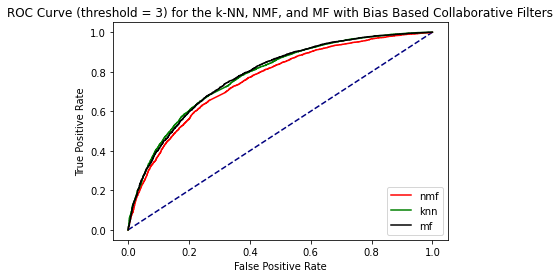

In [ ]:
plt.figure()
plt.plot([0,1], [0,1], color = 'navy', linestyle = '--')
roc_3(pred_nmf, 'nmf', 'red')
roc_3(pred_knn, 'knn', 'green')
roc_3(pred_mf, 'mf', 'black')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (threshold = 3) for the k-NN, NMF, and MF with Bias Based Collaborative Filters")
plt.legend(loc="lower right")
plt.show()

## Question 14

In [ ]:
def popular_user_movie_dic(testset):
  user_popular_dic_testing = {}
  for row in testset:
    userId = row[0]
    rating = row[2]
    if rating >= 3.0:
      if userId in user_popular_dic_testing.keys():
        user_popular_dic_testing[userId].add(row[1])
      else:
        movie_set = set()
        movie_set.add(row[1])
        user_popular_dic_testing[userId] = movie_set
  return user_popular_dic_testing

In [ ]:
def user_movie_dic(testset):
  user_movie_dic = {}
  for row in testset:
    userId = row[0]
    movieId = row[1]
    if userId in user_movie_dic.keys():
      user_movie_dic[userId].add(movieId)
    else:
      movie_set = set()
      movie_set.add(movieId)
      user_movie_dic[userId] = movie_set 
  return user_movie_dic

In [ ]:
def Sort_Tuple(tup):
 
    # reverse = None (Sorts in Descending order)
    # key is set to sort using second element of
    # sublist lambda has been used
    tup.sort(key = lambda x: x[1], reverse=True)
    return tup

In [ ]:
# average precison (Y-axis) against t (X_axis)
# k-nn
avg_precision_knn = []
avg_recall_knn = []
kf = KFold(n_splits=10)
for t in range(1, 26, 1):
  precision_t = []
  recall_t = []
  for trainset, testset in kf.split(dataset):
    user_popular_dic_testing = popular_user_movie_dic(testset)
    user_movie_dic_testing = user_movie_dic(testset)
    # drop the user with |G| = 0 or the user has rated less than t items
    new_testset = [j for j in testset if (j[0] in user_popular_dic_testing.keys() and len(user_movie_dic_testing[j[0]]) >= t)]
    knn_ranking = KNNWithMeans(k = 20, sim_options=sim_options, verbose=False)
    knn_ranking.fit(trainset)
    knn_pred = knn_ranking.test(new_testset)
    users = {}
    for u in knn_pred:
      movie_est = (u.iid, u.est)
      if u.uid in users.keys():
        users[u.uid].append(movie_est)
      else:
        movie_est_list = []
        movie_est_list.append(movie_est)
        users[u.uid] = movie_est_list
    # find the top t ratings for each user
    precisions = []
    recalls = []
    for u in users.keys():
      curr_tuples = users[u]
      sorted_tuples = Sort_Tuple(curr_tuples)
      top_t = sorted_tuples[:t]
      curr_S_t = set([t[0] for t in top_t])
      curr_G = user_popular_dic_testing[u]
      curr_intersection = curr_S_t.intersection(curr_G)
      # print(len(curr_intersection))
      curr_precision = len(curr_intersection) / len(curr_S_t)
      curr_recall = len(curr_intersection) / len(curr_G)
      precisions.append(curr_precision)
      recalls.append(curr_recall)
    precision_t.append(np.mean(precisions))
    recall_t.append(np.mean(recalls))
  avg_precision_knn.append(np.mean(precision_t))
  avg_recall_knn.append(np.mean(recall_t))

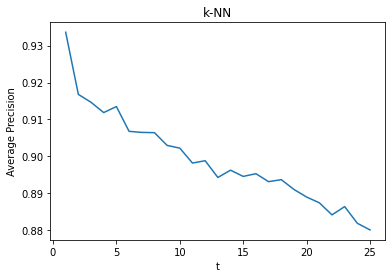

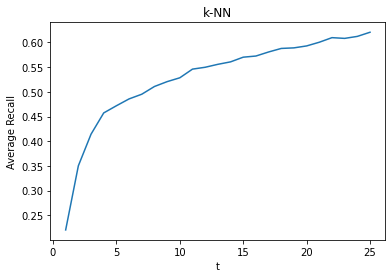

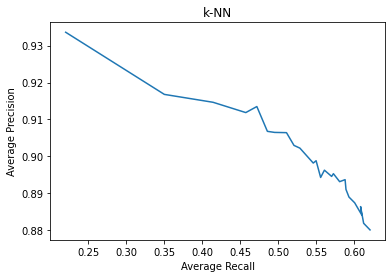

In [ ]:
fig, ax = plt.subplots()
t_list = range(1, 26, 1)
ax.plot(t_list , avg_precision_knn)
plt.xlabel("t")
plt.ylabel("Average Precision")
plt.title("k-NN")
plt.show()

fig, ax = plt.subplots()
ax.plot(t_list ,avg_recall_knn)
plt.xlabel("t")
plt.ylabel("Average Recall")
plt.title("k-NN")
plt.show()

fig, ax = plt.subplots()
ax.plot(avg_recall_knn, avg_precision_knn)
plt.xlabel("Average Recall")
plt.ylabel("Average Precision")
plt.title("k-NN")
plt.show()

In [ ]:
# average precison (Y-axis) against t (X_axis)
# NMF
avg_precision_nmf = []
avg_recall_nmf = []
kf = KFold(n_splits=10)
for t in range(1, 26, 1):
  precision_t = []
  recall_t = []
  for trainset, testset in kf.split(dataset):
    user_popular_dic_testing = popular_user_movie_dic(testset)
    user_movie_dic_testing = user_movie_dic(testset)
    # drop the user with |G| = 0 or the user has rated less than t items
    new_testset = [j for j in testset if (j[0] in user_popular_dic_testing.keys() and len(user_movie_dic_testing[j[0]]) >= t)]
    nmf_ranking = NMF(n_factors=16, verbose=False)
    nmf_ranking.fit(trainset)
    nmf_pred = nmf_ranking.test(new_testset)
    users = {}
    for u in nmf_pred:
      movie_est = (u.iid, u.est)
      if u.uid in users.keys():
        users[u.uid].append(movie_est)
      else:
        movie_est_list = []
        movie_est_list.append(movie_est)
        users[u.uid] = movie_est_list
    # find the top t ratings for each user
    precisions = []
    recalls = []
    for u in users.keys():
      curr_tuples = users[u]
      sorted_tuples = Sort_Tuple(curr_tuples)
      top_t = sorted_tuples[:t]
      curr_S_t = set([t[0] for t in top_t])
      curr_G = user_popular_dic_testing[u]
      curr_intersection = curr_S_t.intersection(curr_G)
      # print(len(curr_intersection))
      curr_precision = len(curr_intersection) / len(curr_S_t)
      curr_recall = len(curr_intersection) / len(curr_G)
      precisions.append(curr_precision)
      recalls.append(curr_recall)
    precision_t.append(np.mean(precisions))
    recall_t.append(np.mean(recalls))
  avg_precision_nmf.append(np.mean(precision_t))
  avg_recall_nmf.append(np.mean(recall_t))

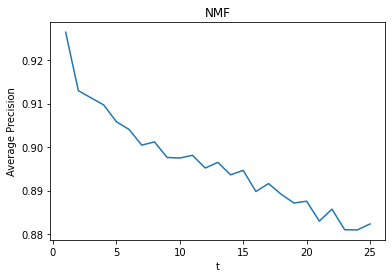

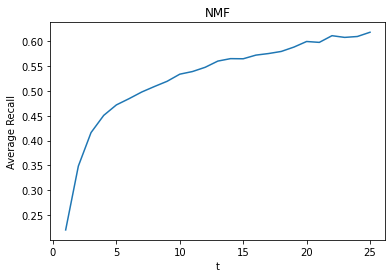

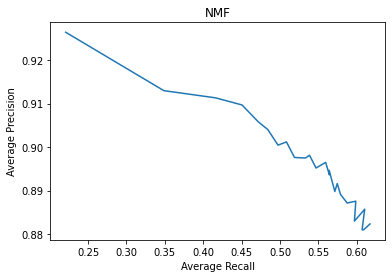

In [ ]:
fig, ax = plt.subplots()
t_list = range(1, 26, 1)
ax.plot(t_list , avg_precision_nmf)
plt.xlabel("t")
plt.ylabel("Average Precision")
plt.title("NMF")
plt.show()

fig, ax = plt.subplots()
ax.plot(t_list ,avg_recall_nmf)
plt.xlabel("t")
plt.ylabel("Average Recall")
plt.title("NMF")
plt.show()

fig, ax = plt.subplots()
ax.plot(avg_recall_nmf, avg_precision_nmf)
plt.xlabel("Average Recall")
plt.ylabel("Average Precision")
plt.title("NMF")
plt.show()

In [ ]:
from surprise.prediction_algorithms.matrix_factorization import SVD

In [ ]:
# average precison (Y-axis) against t (X_axis)
# MF
avg_precision_mf = []
avg_recall_mf = []
kf = KFold(n_splits=10)
for t in range(1, 26, 1):
  precision_t = []
  recall_t = []
  for trainset, testset in kf.split(dataset):
    user_popular_dic_testing = popular_user_movie_dic(testset)
    user_movie_dic_testing = user_movie_dic(testset)
    # drop the user with |G| = 0 or the user has rated less than t items
    new_testset = [j for j in testset if (j[0] in user_popular_dic_testing.keys() and len(user_movie_dic_testing[j[0]]) >= t)]
    mf_ranking = SVD(n_factors=16, verbose=False)
    mf_ranking.fit(trainset)
    mf_pred = mf_ranking.test(new_testset)
    users = {}
    for u in mf_pred:
      movie_est = (u.iid, u.est)
      if u.uid in users.keys():
        users[u.uid].append(movie_est)
      else:
        movie_est_list = []
        movie_est_list.append(movie_est)
        users[u.uid] = movie_est_list
    # find the top t ratings for each user
    precisions = []
    recalls = []
    for u in users.keys():
      curr_tuples = users[u]
      sorted_tuples = Sort_Tuple(curr_tuples)
      top_t = sorted_tuples[:t]
      curr_S_t = set([t[0] for t in top_t])
      curr_G = user_popular_dic_testing[u]
      curr_intersection = curr_S_t.intersection(curr_G)
      # print(len(curr_intersection))
      curr_precision = len(curr_intersection) / len(curr_S_t)
      curr_recall = len(curr_intersection) / len(curr_G)
      precisions.append(curr_precision)
      recalls.append(curr_recall)
    precision_t.append(np.mean(precisions))
    recall_t.append(np.mean(recalls))
  avg_precision_mf.append(np.mean(precision_t))
  avg_recall_mf.append(np.mean(recall_t))

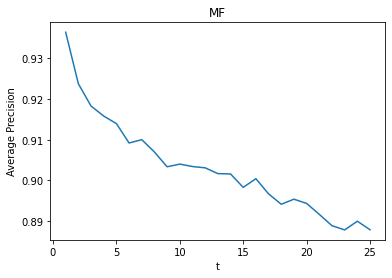

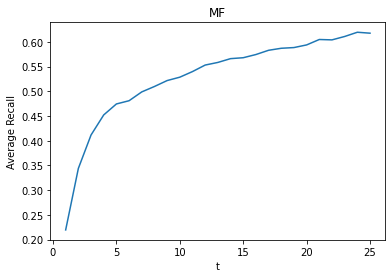

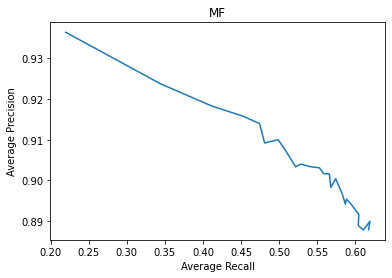

In [ ]:
fig, ax = plt.subplots()
t_list = range(1, 26, 1)
ax.plot(t_list , avg_precision_mf)
plt.xlabel("t")
plt.ylabel("Average Precision")
plt.title("MF")
plt.show()

fig, ax = plt.subplots()
ax.plot(t_list ,avg_recall_mf)
plt.xlabel("t")
plt.ylabel("Average Recall")
plt.title("MF")
plt.show()

fig, ax = plt.subplots()
ax.plot(avg_recall_mf, avg_precision_mf)
plt.xlabel("Average Recall")
plt.ylabel("Average Precision")
plt.title("MF")
plt.show()

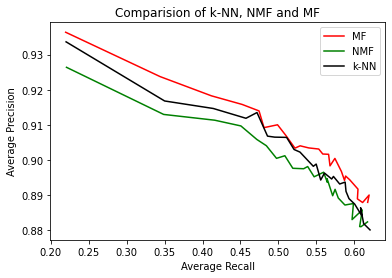

In [ ]:
plt.figure()
plt.plot(avg_recall_mf, avg_precision_mf, color='red', label='MF')
plt.plot(avg_recall_nmf, avg_precision_nmf, color='green', label='NMF')
plt.plot(avg_recall_knn, avg_precision_knn, color='black', label='k-NN')
plt.xlabel("Average Recall")
plt.ylabel("Average Precision")
plt.title("Comparision of k-NN, NMF and MF")
plt.legend(loc="upper right")
plt.show()